<a href="https://colab.research.google.com/github/Jeffrey1999/Machine-learning/blob/main/License_Plate_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)
#installing YOLOv8
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="rpkbzrBvmioBl20R9byH")
project = rf.workspace("automatic-license-plate-recognition-kxxzn").project("license-plate-detection-ee9ca")
dataset = project.version(4).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.2 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to License-Plate-Detection-4 in yolov8:: 100%|██████████| 1812/1812 [00:00<00:00, 2338.90it/s]


In [ ]:
from ultralytics import YOLO

# Load a model

model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)
model.train(data="/content/datasets/License-Plate-Detection-4/data.yaml", epochs=5,imgsz=640, plots=True)  # train the model

# metrics = model.val()  # evaluate model performance on the validation set
# results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
# path = model.export(format="onnx")  # export the model to ONNX format

100%|██████████| 21.5M/21.5M [00:00<00:00, 81.1MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/License-Plate-Detection-4/data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opti

In [ ]:
path = model.export(format="onnx",simplify)  # export the model to ONNX format
# model.export(format="onnx",opset=12)  # export the model to ONNX format

SyntaxError: ignored

In [ ]:
!ls /content/datasets/runs/detect/train

args.yaml					   train_batch1.jpg
confusion_matrix.png				   train_batch2.jpg
events.out.tfevents.1686621604.888dbd8196d7.696.0  val_batch0_labels.jpg
F1_curve.png					   val_batch0_pred.jpg
P_curve.png					   val_batch1_labels.jpg
PR_curve.png					   val_batch1_pred.jpg
R_curve.png					   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


/content


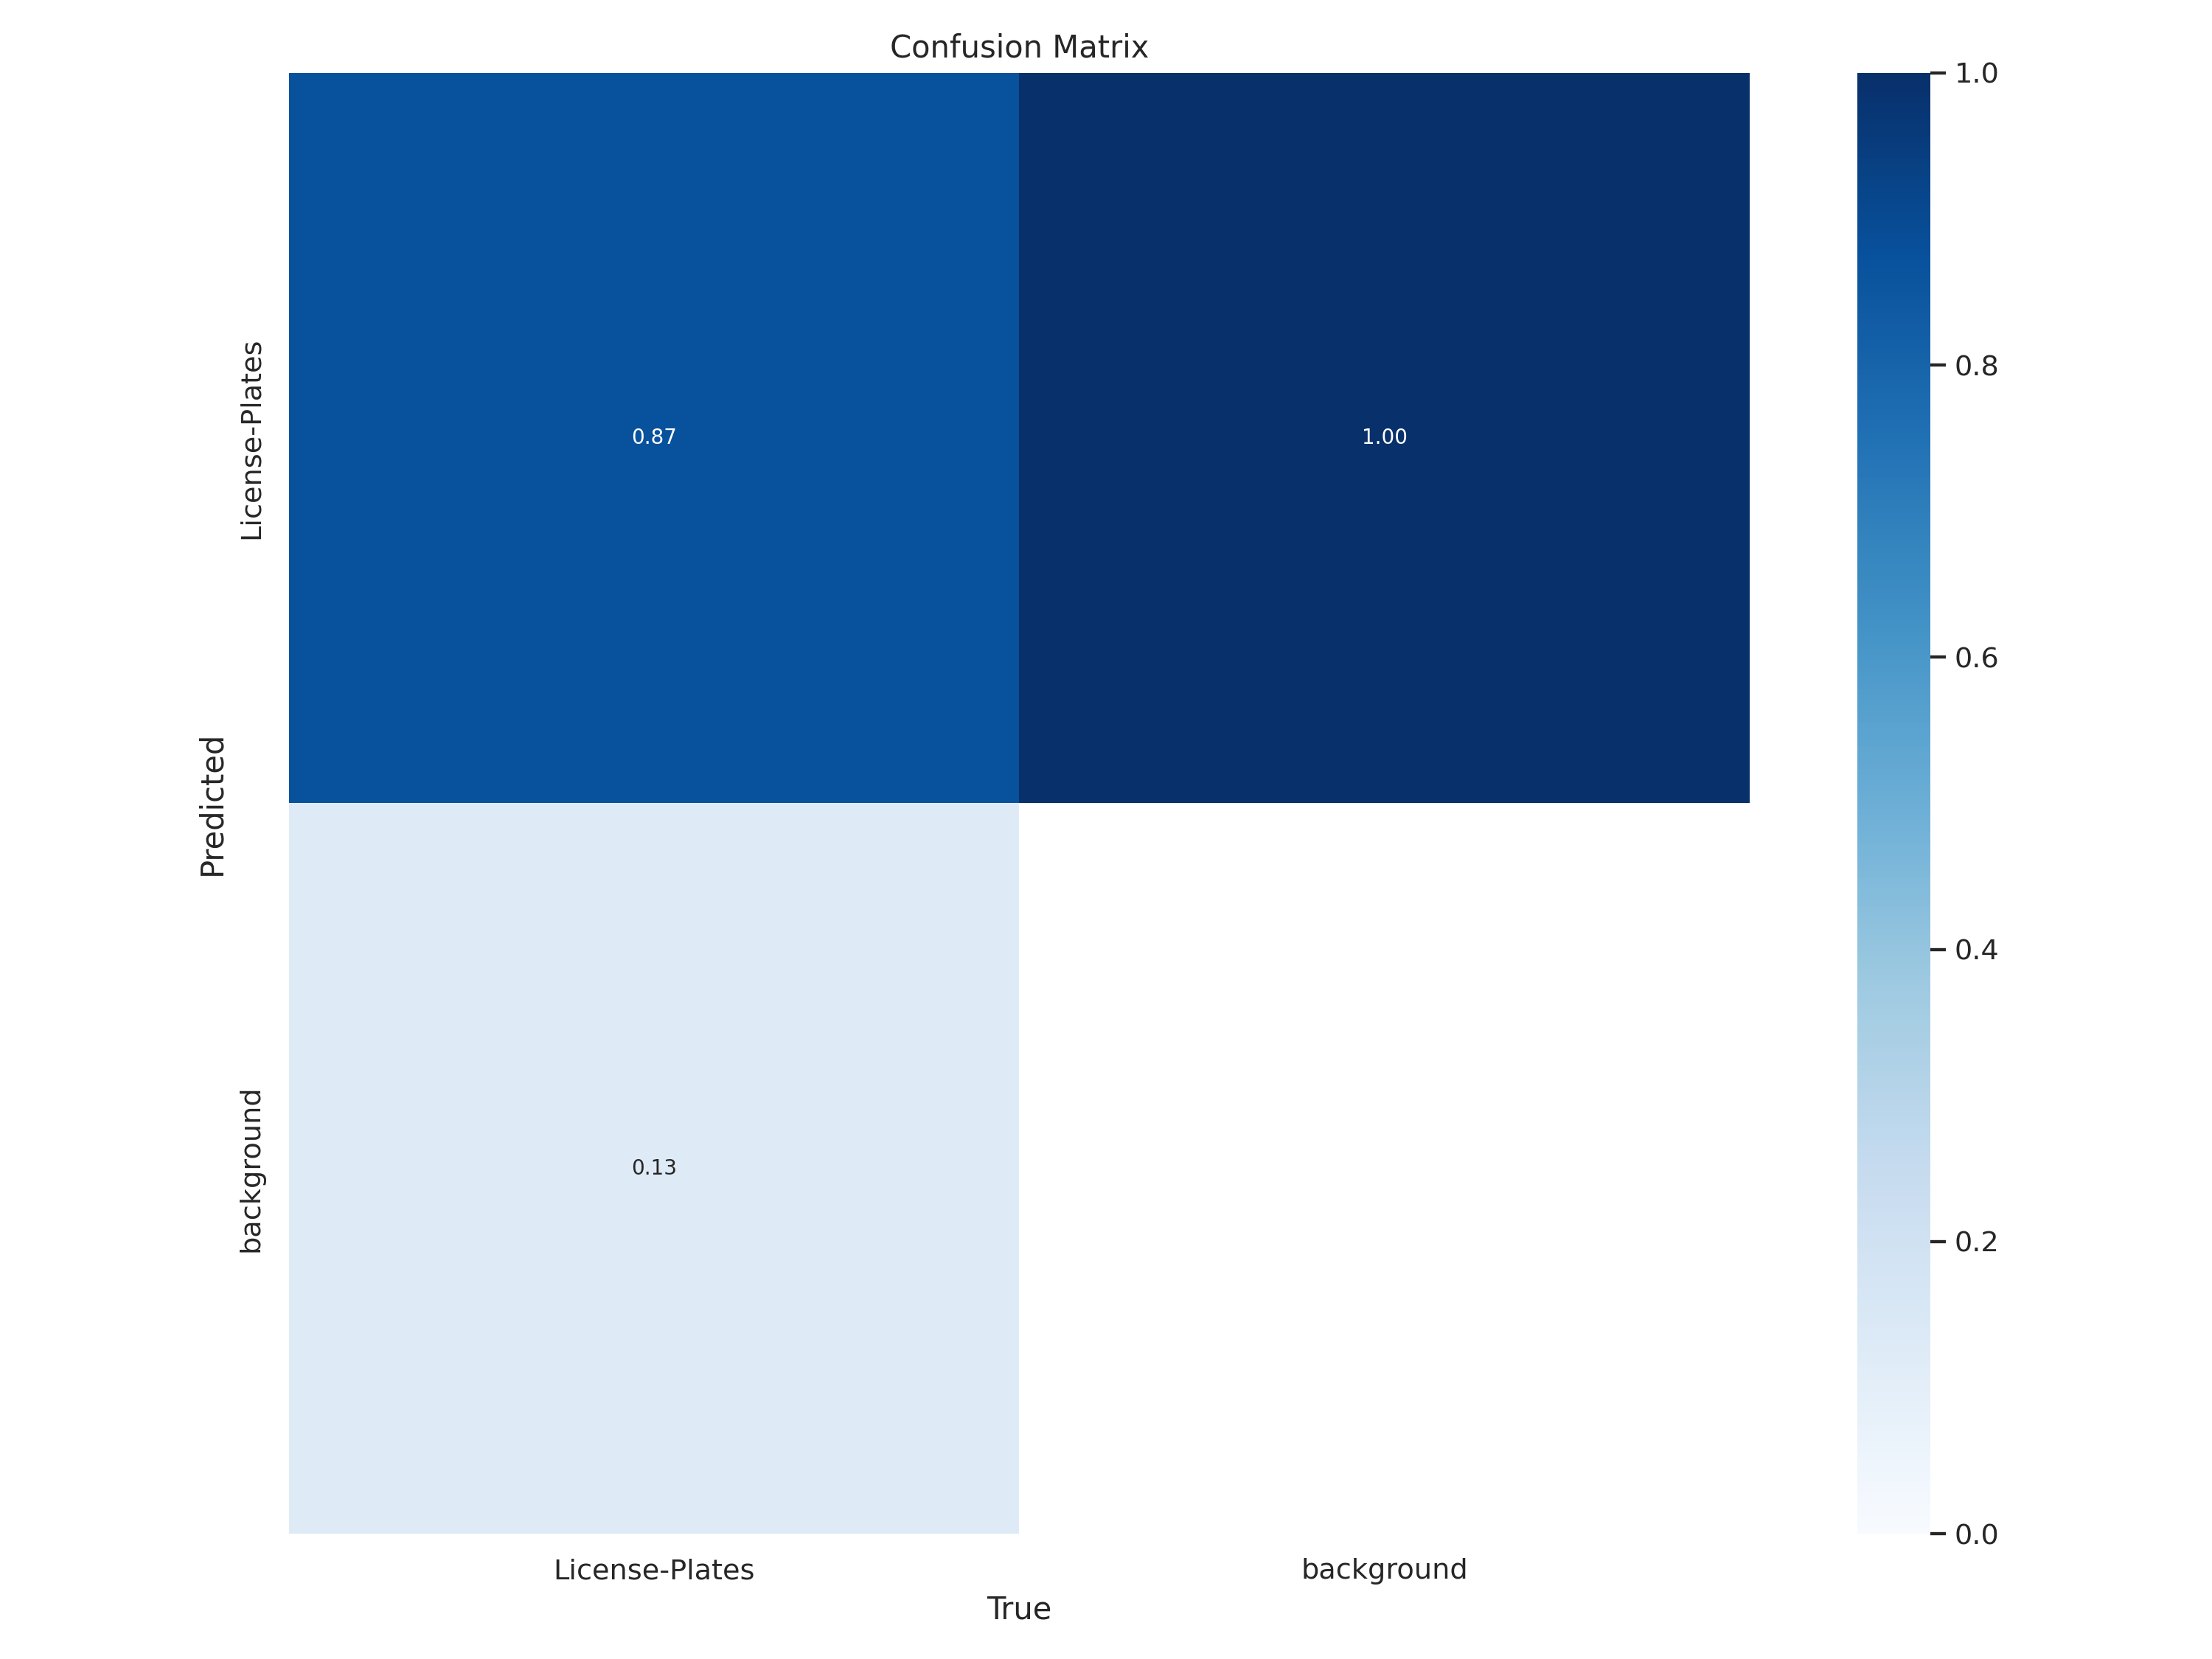

In [ ]:
%cd {HOME}
Image(filename=f'/content/datasets/runs/detect/train/confusion_matrix.png', width=600)

/content


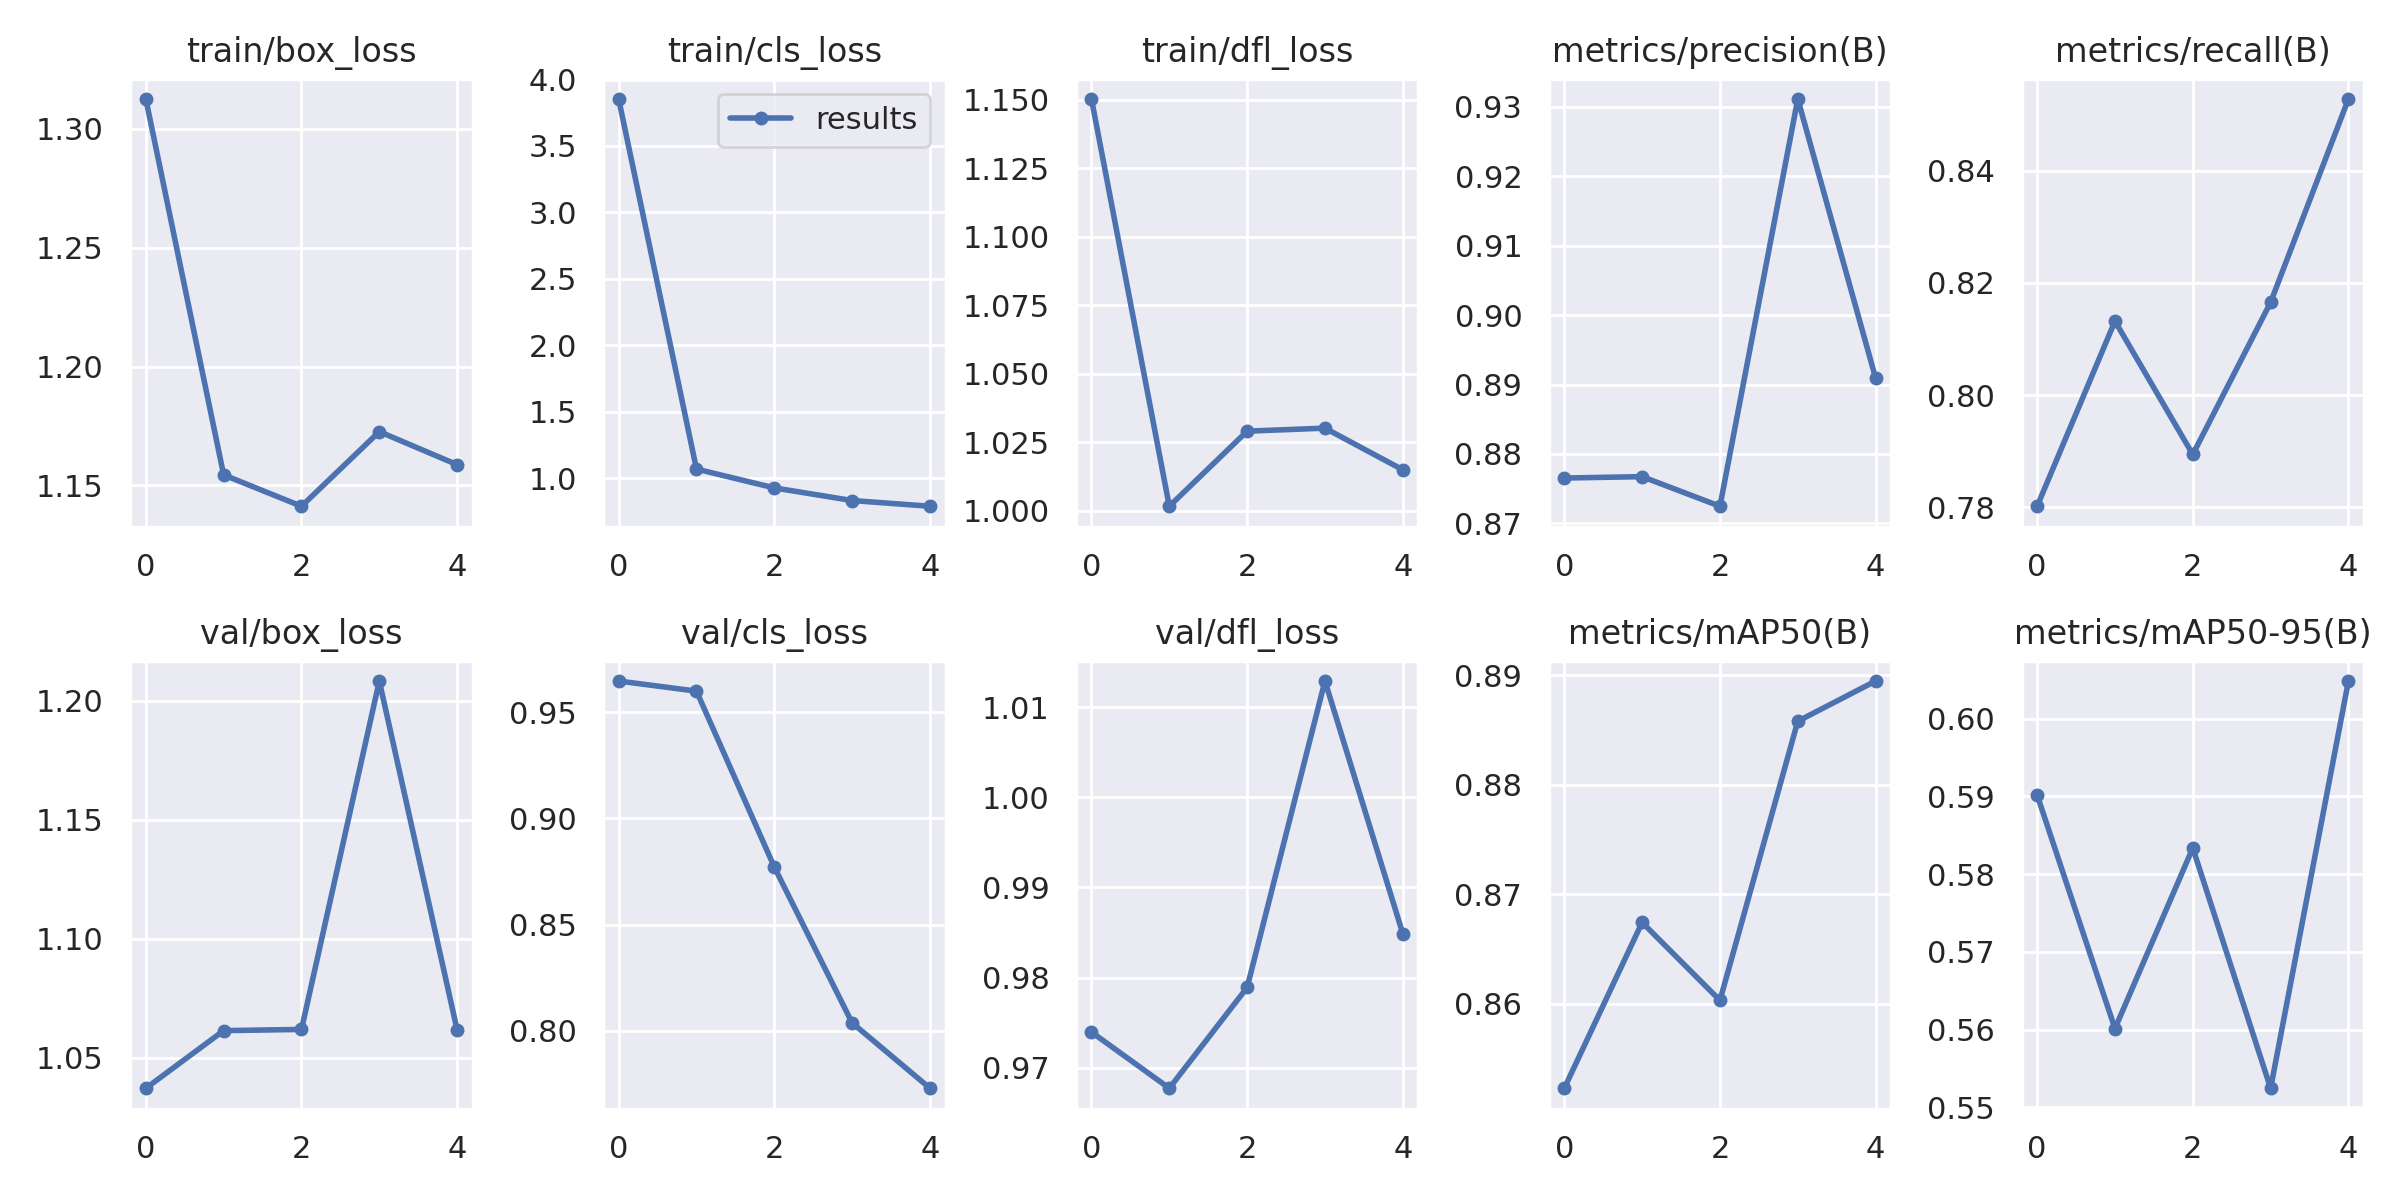

In [ ]:
%cd {HOME}
Image(filename=f'/content/datasets/runs/detect/train/results.png', width=600)

/content


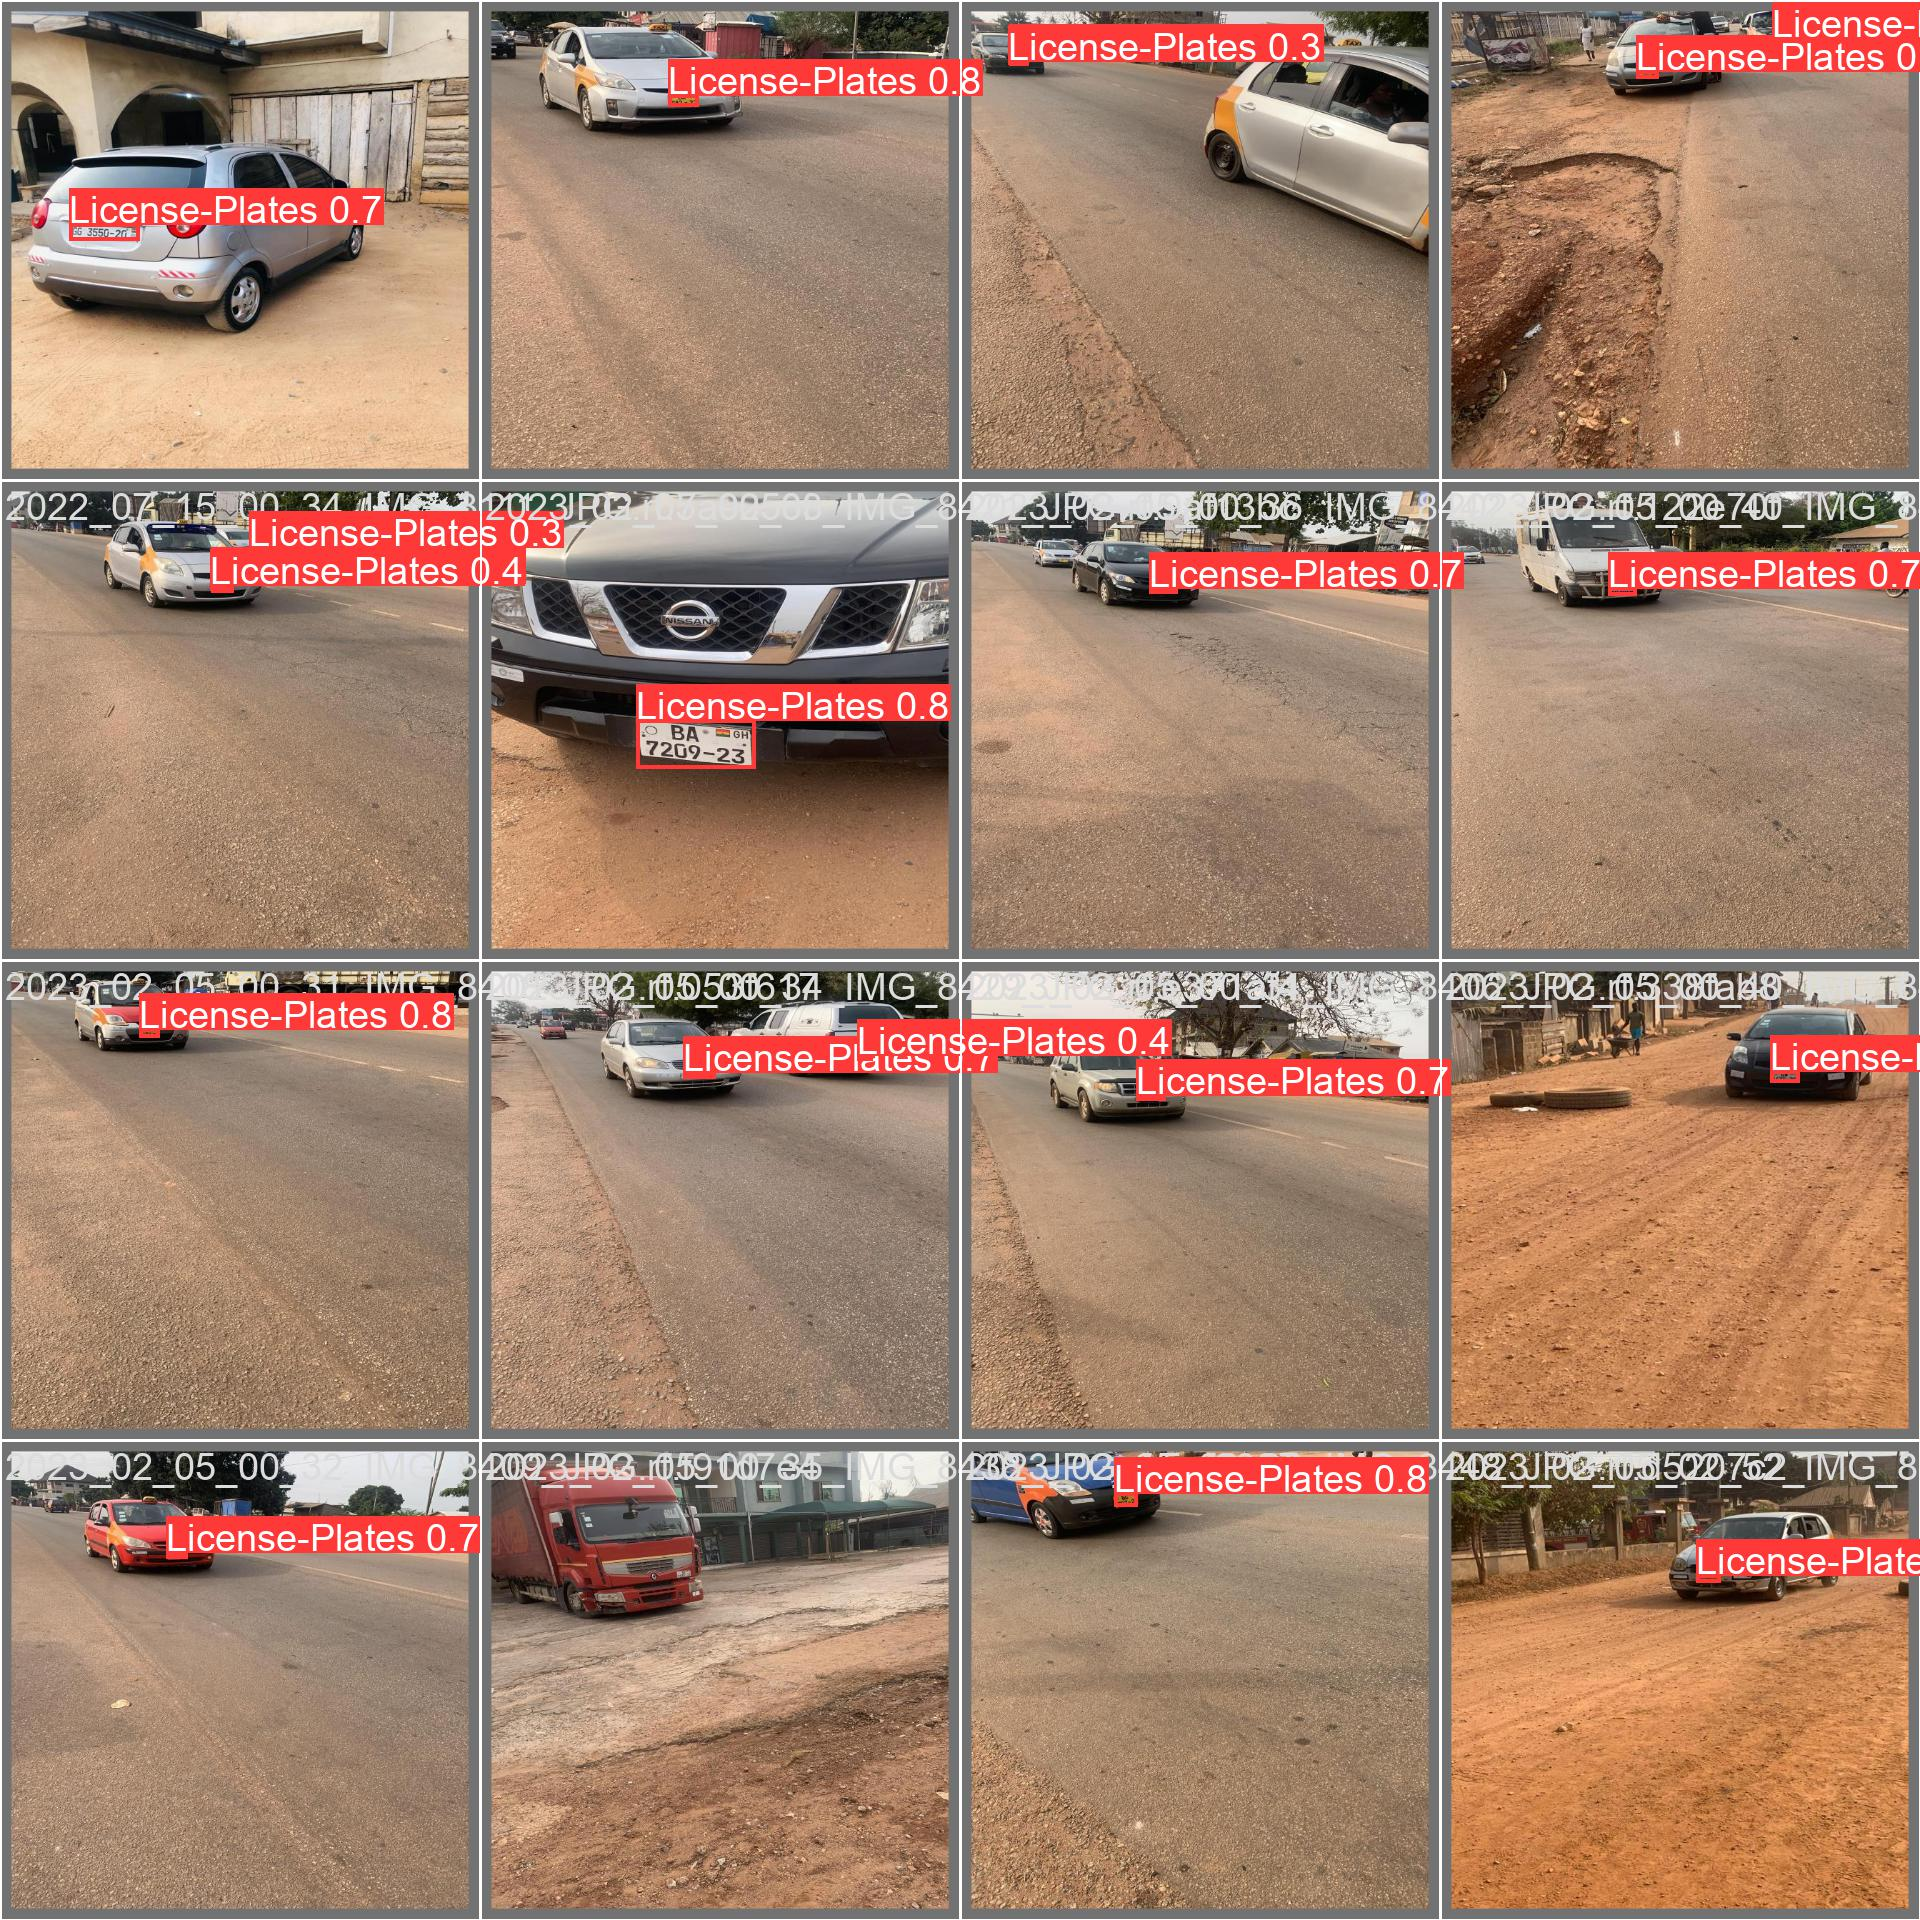

In [ ]:
%cd {HOME}
Image(filename=f'/content/datasets/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/datasets/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-06-13 04:12:36.090831: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/91 /content/datasets/License-Plate-Detection-4/test/images/2022_05_22_16_49_IMG_0722_JPG.rf.160dc1aef118a1c65a50f4c4304f28da.jpg: 640x640 764.6ms
image 2/91 /content/datasets/License-Plate-Detection-4/test/images/2023_02_02_03_59_IMG_7396_JPG.rf.fc8393cd8e93e88f3299b4033b138017.jpg: 640x640 1 License-Plates, 923.9ms
image 3/91 /content/datasets/License-Plate-Detection-4/test/images/2023_02_02_04_00_IMG_7398_JPG.rf.712eb1691f5cea6fdd2be091912850a3.jpg: 640x640 1 License-Plates, 1249.4ms
image 4/91 /content/datasets/License-Plate-Detection-4/test/images/2023_02_02_04_00_IMG_7400_JPG.rf.db5678564025812c38bbf8f65be235aa.jpg: 640x640 1 License-Plates, 1128.8ms
image 5/91 /content/datasets/License-Plate-Detectio

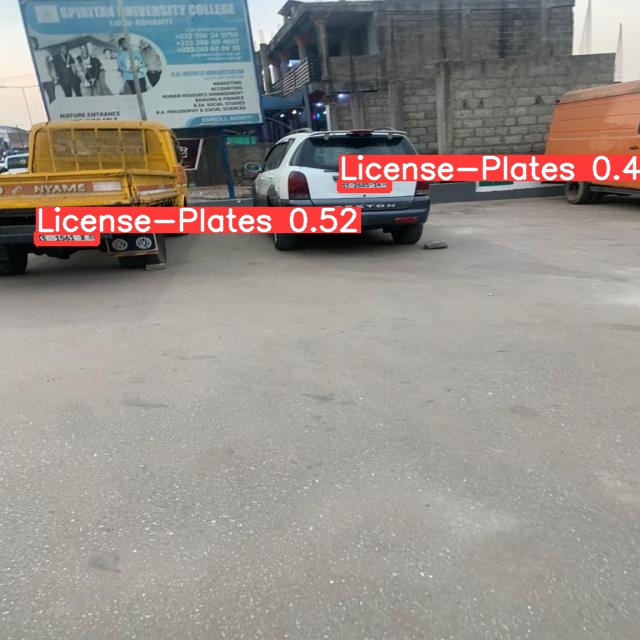

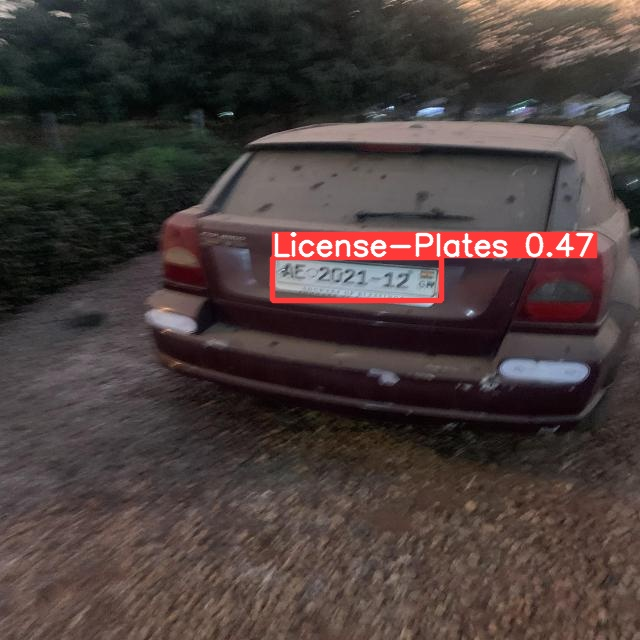

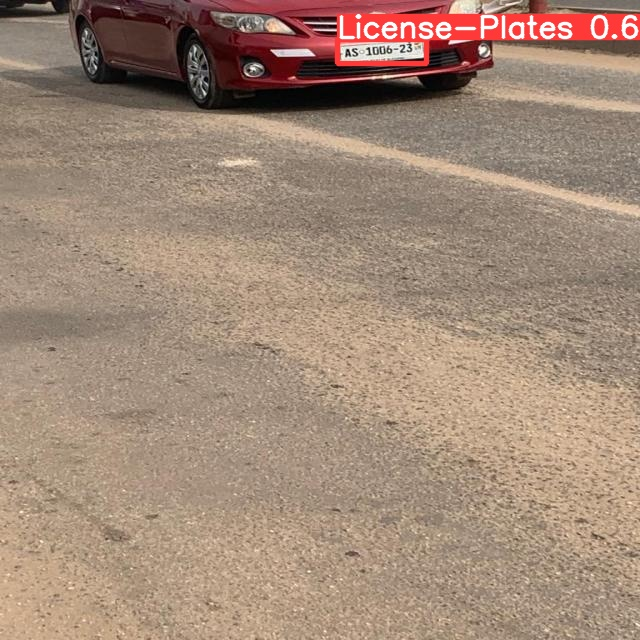

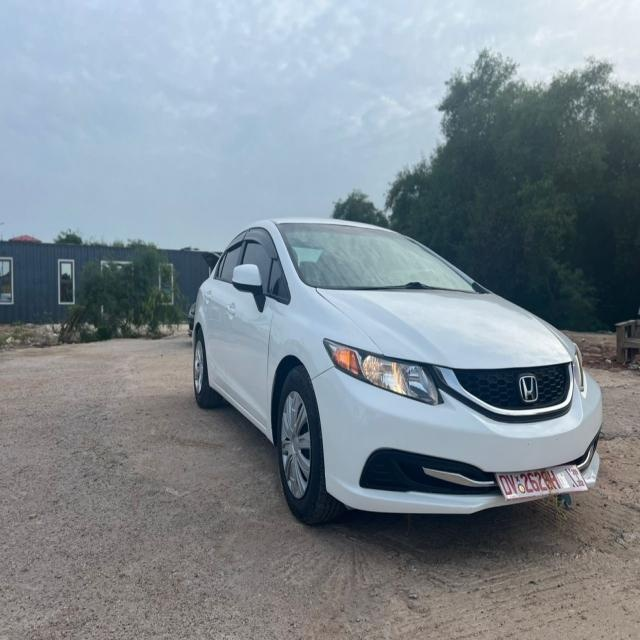

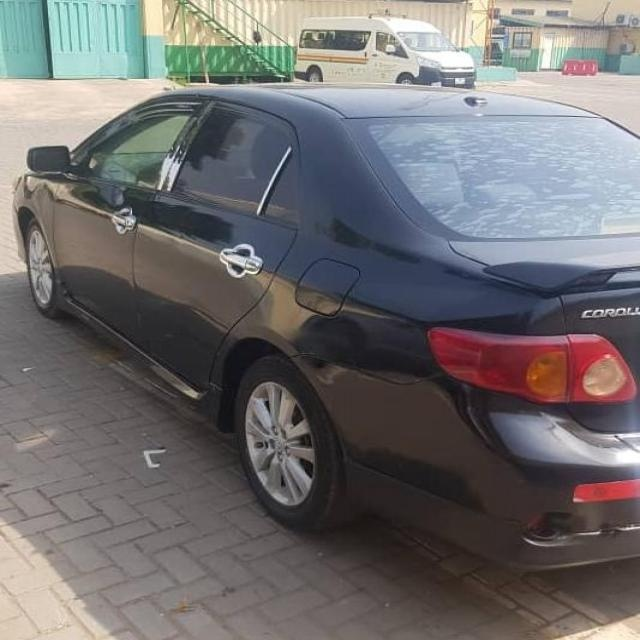

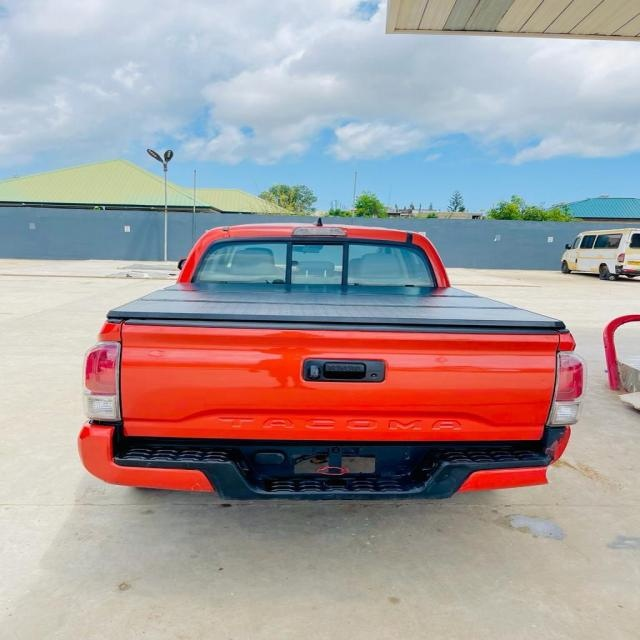

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:6]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!pip install torch=-1.11.0 torchvision=-0.12.0 torchaudio=-0.11.0 torchtext==0.12.0
!pip install onnx--1.12.6
!pip show torch
!pip show torchvision

ERROR: Invalid requirement: 'torch=-1.11.0'
Hint: = is not a valid operator. Did you mean == ?
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement onnx--1.12.6 (from versions: none)
ERROR: No matching distribution found for onnx--1.12.6
Name: torch
Version: 2.0.1+cu118
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, jinja2, networkx, sympy, triton, typing-extensions
Required-by: easyocr, fastai, thop, torchaudio, torchdata, torchtext, torchvision, triton, ultralytics
Name: torchvision
Version: 0.15.2+cu118
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch

In [ ]:
model.predict("/content/TEST/TEST2.png", save=True , save_txt =True)

Results saved to runs/detect/predict2
2 labels saved to runs/detect/predict2/labels


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([4, 6])
 dtype: torch.float32
  + tensor([[1.81000e+02, 7.74000e+02, 3.26000e+02, 8.08000e+02, 6.93937e-01, 0.00000e+00],
         [9.65000e+02, 7.72000e+02, 1.10000e+03, 8.04000e+02, 6.68995e-01, 0.00000e+00],
         [1.73200e+03, 8.21000e+02, 1.87000e+03, 8.51000e+02, 4.83227e-01, 0.00000e+00],
         [1.81000e+02, 7.85000e+02, 3.24000e+02, 8.11000e+02, 3.07394e-01, 0.00000e+00]])]

In [ ]:

model.predict("/content/TEST/TEST.mov", save=True , save_txt =True)

In [ ]:

 import cv2

In [ ]:
!pip install easyocr


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 11.8 MB/s eta 0:00:00


In [ ]:
import easyocr

# initialize the EasyOCR reader
reader = easyocr.Reader(['en'])

def extract_text(image,bbox):
    x,y,w,h = bbox
    roi = image[y:y+h, x:x+w]

    if 0 in roi.shape:
        return 'no number'

    else:
        # extract text using EasyOCR
        result = reader.readtext(roi)
        text = ' '.join([res[1] for res in result])
        text = text.strip()

        return text

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
# test
from PIL import Image
img = Image.open('/content/TEST/TEST1.png')

import numpy as np
img = np.array(img)
results, texts = yolo_predictions(img, net)
texts

In [ ]:
import cv2

# Load Model
net = cv2.dnn.readNet('/content/datasets/runs/detect/train/weights/best.onnx')


In [ ]:
modelWeights = "models/yolov5n.onnx"
net = cv2.dnn.readNet(modelWeights)

error: ignored

In [ ]:
# LOAD YOLO MODEL
net = cv2.dnn.readNetFromONNX('/content/datasets/runs/detect/train/weights/best.onnx')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)


In [ ]:
# settings
INPUT_WIDTH =  640
INPUT_HEIGHT = 640

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imageio
import plotly.express as px


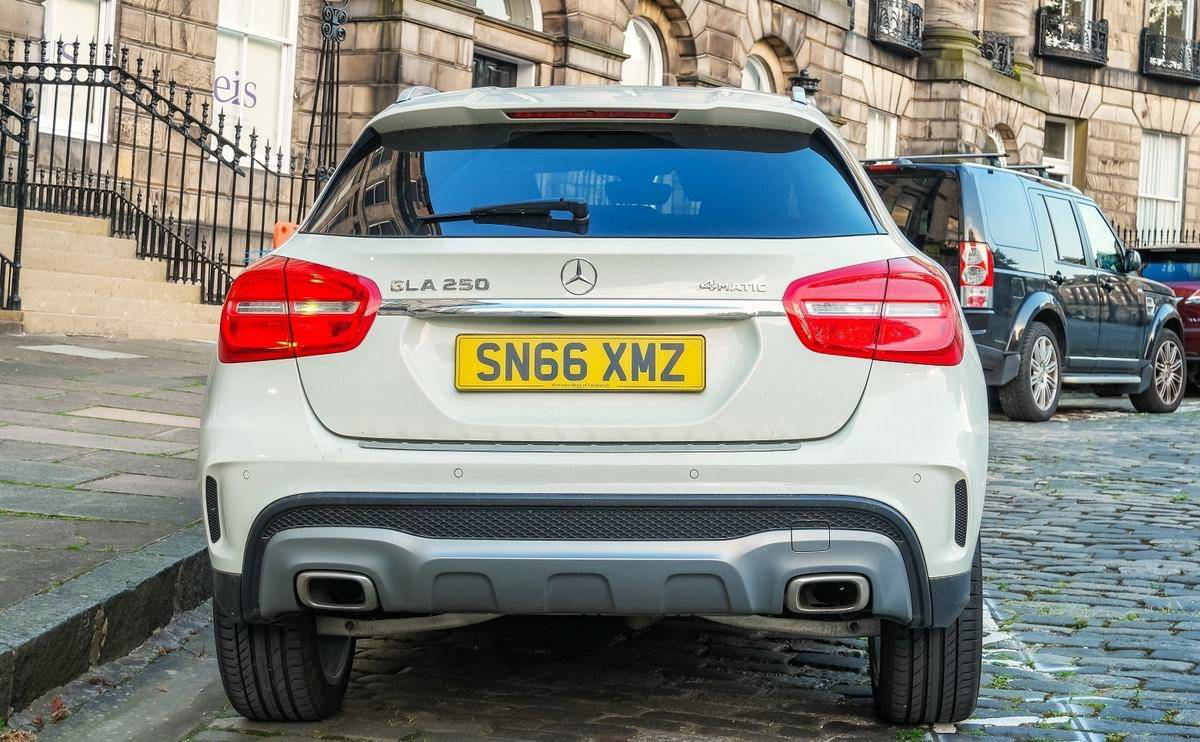

In [ ]:
# LOAD THE IMAGE

img = imageio.imread('/content/TEST/TEST1.png')
# img = imageio.imread('/content/datasets/License-Plate-Detection-4/train/images/2023_02_02_04_34_IMG_7566_JPG.rf.8387440fdf813daf2bd9fa07000bcb35.jpg')

fig = px.imshow(img)
fig.update_layout(width=700, height=400, margin=dict(l=10, r=10, b=10, t=10))
fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
fig.show()

In [ ]:
!yolo task=detect mode=predict model=/content/datasets/runs/detect/train/weights/best.pt conf=0.25 source=/content/TEST/TEST.mov

2023-06-08 09:05:13.225734: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/213) /content/TEST/TEST.mov: 384x640 1 License-Plates, 276.2ms
video 1/1 (2/213) /content/TEST/TEST.mov: 384x640 1 License-Plates, 260.5ms
video 1/1 (3/213) /content/TEST/TEST.mov: 384x640 1 License-Plates, 261.7ms
video 1/1 (4/213) /content/TEST/TEST.mov: 384x640 1 License-Plates, 262.7ms
video 1/1 (5/213) /content/TEST/TEST.mov: 384x640 1 License-Plates, 243.9ms
video 1/1 (6/213) /content/TEST/TEST.mov: 384x640 1 License-Plates, 245.5ms
video 1/1 (7/213) /content/TEST/TEST.mov: 384x640 1 License-Plates, 247.6ms
video 1/1 (8/213) /content/TEST/TEST.mov: 384x640 1 License-Plates, 248.5ms
video 1/1 (9/213) /content/TEST/TEST.mov: 384x640 1 License-Plates, 269.0ms
video 1/1 (10/213) /content/TEST/TEST.mov: 384x6

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

#input video path
save_path='/content/TEST/TEST.mov'

#compressed video path
compressed_path='/content/TEST/TEST.mov'
os.system(f"ffmpeg -i{save_path} -vcodec libx264 {compressed_path}")
#Show video
mp4=open(compressed_path, 'rb').read()
data_url="data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
       <video width=400 controls>
          <source src="%s" type="video/mp4">
          </video>
          """ % data_url)

In [ ]:
inputs = [img, img]  # list of numpy arrays
results = model(inputs)  # list of Results objects

for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs


In [ ]:
results = model(img)
boxes = results[0].boxes
box = boxes[0]  # returns one box
box.xyxy


tensor([[452., 332., 705., 390.]])

In [ ]:
roi=img[]

In [ ]:
boxes.xywh


tensor([[578.50000, 361.00000, 253.00000,  58.00000]])

In [ ]:

boxes.xyxy

tensor([[452., 332., 705., 390.]])

In [ ]:
boxes.cls

tensor([0.])

In [ ]:
pip install easyocr


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 15.7 MB/s eta 0:00:00


In [ ]:
import easyocr


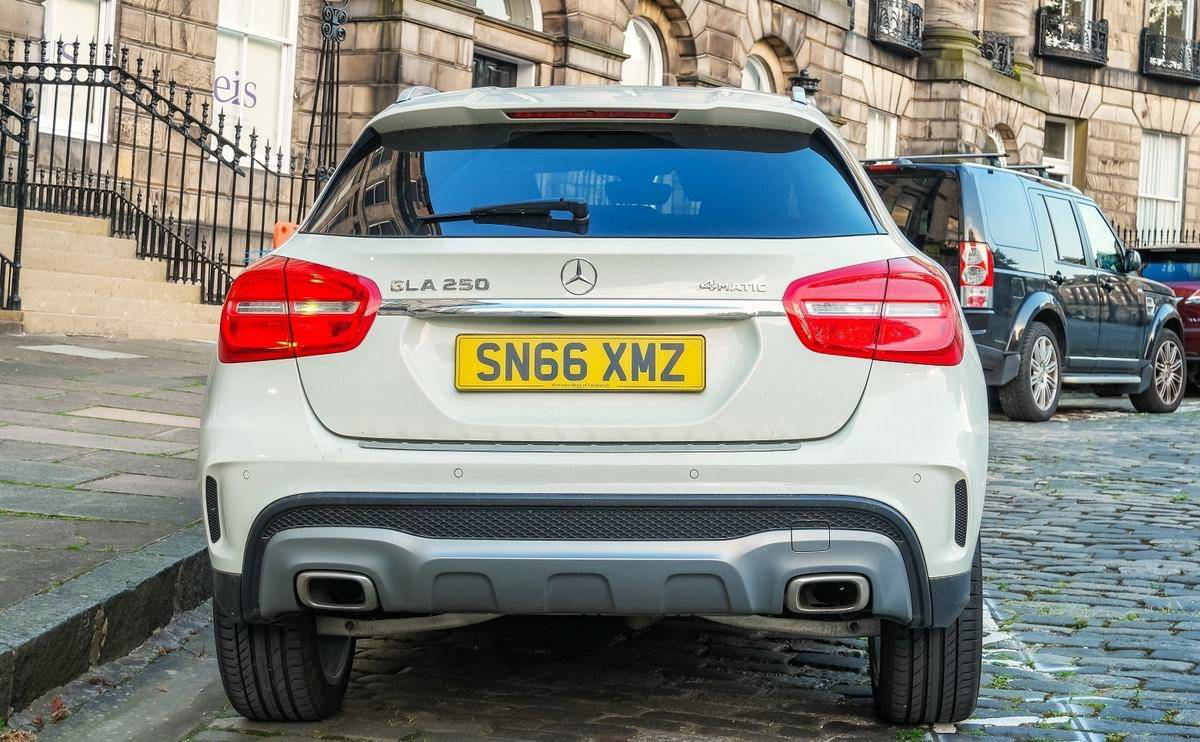

In [ ]:
# LOAD THE IMAGE

img = imageio.imread('/content/TEST/TEST1.png')
# img = imageio.imread('/content/datasets/License-Plate-Detection-4/train/images/2023_02_02_04_34_IMG_7566_JPG.rf.8387440fdf813daf2bd9fa07000bcb35.jpg')

fig = px.imshow(img)
fig.update_layout(width=700, height=400, margin=dict(l=10, r=10, b=10, t=10))
fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
fig.show()

In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

reader = easyocr.Reader(['en'], gpu=True)
def ocr_image(img,coordinates):
    x,y,w, h = int(coordinates[0]), int(coordinates[1]), int(coordinates[2]),int(coordinates[3])
    img = img[y:h,x:w]

    gray = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)
    #gray = cv2.resize(gray, None, fx = 3, fy = 3, interpolation = cv2.INTER_CUBIC)
    result = reader.readtext(gray)
    text = ""

    for res in result:
        if len(result) == 1:
            text = res[1]
        if len(result) >1 and len(res[1])>6 and res[2]> 0.2:
            text = res[1]
    #     text += res[1] + " "

    return str(text)

In [ ]:
# read image
image_path = '/content/runs/detect/predict/2023_02_02_04_01_IMG_7407_JPG.rf.7597ec83ca18592704d1a5be11081d20.jpg'

img = cv2.imread(image_path)

# instance text detector
reader = easyocr.Reader(['en'], gpu=False)

# detect text on image
text_ = reader.readtext(img)

threshold = 0.25
# draw bbox and text
for t_, t in enumerate(text_):
    print(t)

    bbox, text, score = t

    if score > threshold:
        cv2.rectangle(img, bbox[0], bbox[2], (0, 255, 0), 5)
        cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 0.65, (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!yolo task=detect mode=predict model=/content/datasets/runs/detect/train/weights/best.pt conf=0.25 source=/content/TEST/TEST1.png

2023-06-11 16:02:21.295960: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/TEST/TEST1.png: 416x640 1 License-Plates, 403.2ms
Speed: 2.2ms pre-process, 403.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
!yolo task=detect mode=predict model=/content/datasets/runs/detect/train/weights/best.pt conf=0.25 source=/content/TEST/TEST2.png

2023-06-11 16:01:18.888654: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/TEST/TEST2.png: 352x640 4 License-Platess, 370.6ms
Speed: 2.6ms pre-process, 370.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
model.predict("/content/TEST/TEST1.png", save=True , save_txt =True)

Results saved to runs/detect/predict2
1 label saved to runs/detect/predict2/labels


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([1, 6])
 dtype: torch.float32
  + tensor([[4.54000e+02, 3.31000e+02, 7.04000e+02, 3.93000e+02, 5.49915e-01, 0.00000e+00]])]

In [ ]:
!yolo task=detect mode=predict model=/content/datasets/runs/detect/train/weights/best.pt conf=0.25 source=/content/TEST/TEST.mov

2023-06-11 15:52:47.979344: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/213) /content/TEST/TEST.mov: 384x640 1 License-Plates, 402.9ms
video 1/1 (2/213) /content/TEST/TEST.mov: 384x640 1 License-Plates, 381.7ms
video 1/1 (3/213) /content/TEST/TEST.mov: 384x640 1 License-Plates, 572.8ms
video 1/1 (4/213) /content/TEST/TEST.mov: 384x640 569.2ms
video 1/1 (5/213) /content/TEST/TEST.mov: 384x640 563.1ms
video 1/1 (6/213) /content/TEST/TEST.mov: 384x640 1 License-Plates, 539.5ms
video 1/1 (7/213) /content/TEST/TEST.mov: 384x640 548.7ms
video 1/1 (8/213) /content/TEST/TEST.mov: 384x640 1 License-Plates, 551.5ms
video 1/1 (9/213) /content/TEST/TEST.mov: 384x640 1 License-Plates, 503.4ms
video 1/1 (10/213) /content/TEST/TEST.mov: 384x640 1 License-Plates, 361.1ms
video 1/1 (11/213) /conte

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(roi)
plt.show()

NameError: ignored

In [ ]:
bbox_raw=result.xyxy[0][0]
bbox=[]

NameError: ignored

In [ ]:
results = model(img)
boxes = results[0].boxes
box = boxes[0]  # returns one box
box.xyxy
results.print()

AttributeError: ignored

In [ ]:
# results = model(img)
# results.xyxy[0][0]


AttributeError: ignored